# **Statistical Analysis of Differences in Median Purchase Amounts Across Age Groups**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('walmart.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


<h4 style="font-size:24px; line-height:1.5; padding:5px;">
<b>Visualizing the difference in median purchase amounts across age groups</b>
</h4>

In [3]:
unique_ages = df["Age"].unique()
print(unique_ages)

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


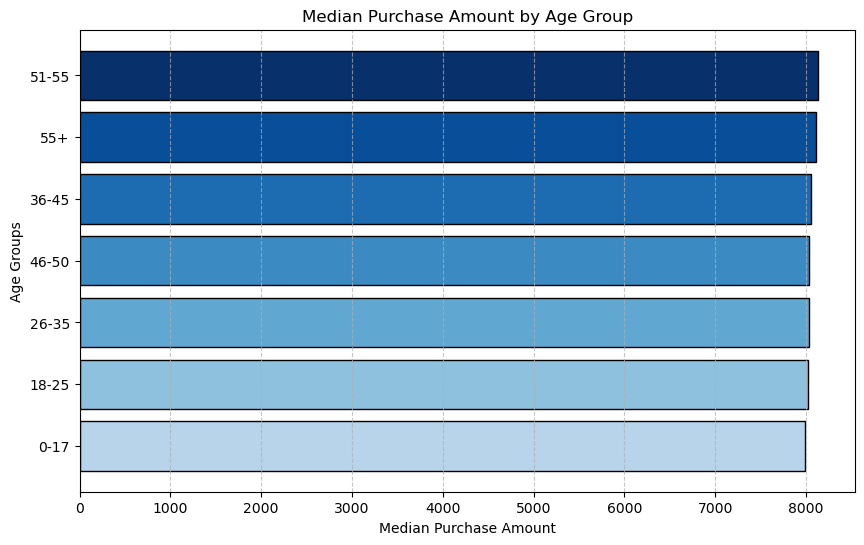

In [4]:
# Group by Age
Age_1_purchases = df[df["Age"] == "0-17"]["Purchase"].dropna()
Age_2_purchases = df[df["Age"] == "18-25"]["Purchase"].dropna()
Age_3_purchases = df[df["Age"] == "26-35"]["Purchase"].dropna()
Age_4_purchases = df[df["Age"] == "36-45"]["Purchase"].dropna()
Age_5_purchases = df[df["Age"] == "46-50"]["Purchase"].dropna()
Age_6_purchases = df[df["Age"] == "51-55"]["Purchase"].dropna()
Age_7_purchases = df[df["Age"] == "55+"]["Purchase"].dropna()

# Age groups and corresponding median purchases
age_groups = ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"]
median_purchases = [
    Age_1_purchases.median(),
    Age_2_purchases.median(),
    Age_3_purchases.median(),
    Age_4_purchases.median(),
    Age_5_purchases.median(),
    Age_6_purchases.median(),
    Age_7_purchases.median()
]

# Sort the data from small to large
sorted_indices = np.argsort(median_purchases) 
sorted_age_groups = np.array(age_groups)[sorted_indices]
sorted_median_purchases = np.array(median_purchases)[sorted_indices]

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(sorted_median_purchases)))  
plt.barh(sorted_age_groups, sorted_median_purchases, color=colors, edgecolor='black')

# Add labels and title
plt.ylabel("Age Groups")
plt.xlabel("Median Purchase Amount")
plt.title("Median Purchase Amount by Age Group")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<h4 style="font-size:24px; line-height:1.5; padding:5px;">
<b>Conduct a Normality Test using the Anderson-Darling test</b>
</h4>

In [5]:
from scipy.stats import anderson

# Apply Anderson-Darling test for normality to each age group
def test_anderson_normality(age_group_data, age_group_name):
    result = anderson(age_group_data)
    print(f"{age_group_name}: Anderson-Darling Statistic = {result.statistic:.4f}")
    # Compare the statistic to the critical values for significance
    if result.statistic < result.critical_values[2]:  # 5% significance level
        print(f"{age_group_name}: Data follows a normal distribution (p > 0.05)")
    else:
        print(f"{age_group_name}: Data does not follow a normal distribution (p < 0.05)")

# Run the test for each age group
test_anderson_normality(Age_1_purchases, "Age 0-17")
test_anderson_normality(Age_2_purchases, "Age 18-25")
test_anderson_normality(Age_3_purchases, "Age 26-35")
test_anderson_normality(Age_4_purchases, "Age 36-45")
test_anderson_normality(Age_5_purchases, "Age 46-50")
test_anderson_normality(Age_6_purchases, "Age 51-55")
test_anderson_normality(Age_7_purchases, "Age 55+")

Age 0-17: Anderson-Darling Statistic = 216.7720
Age 0-17: Data does not follow a normal distribution (p < 0.05)
Age 18-25: Anderson-Darling Statistic = 1640.1995
Age 18-25: Data does not follow a normal distribution (p < 0.05)
Age 26-35: Anderson-Darling Statistic = 3862.4819
Age 26-35: Data does not follow a normal distribution (p < 0.05)
Age 36-45: Anderson-Darling Statistic = 1801.2275
Age 36-45: Data does not follow a normal distribution (p < 0.05)
Age 46-50: Anderson-Darling Statistic = 771.3258
Age 46-50: Data does not follow a normal distribution (p < 0.05)
Age 51-55: Anderson-Darling Statistic = 652.0910
Age 51-55: Data does not follow a normal distribution (p < 0.05)
Age 55+: Anderson-Darling Statistic = 368.2460
Age 55+: Data does not follow a normal distribution (p < 0.05)


<h4 style="font-size:24px; line-height:1.5; padding:5px;">
<b>Since the data does not follow a normal distribution, we use a Nonparametric test (Kruskal-Wallis H test) to assess whether there is a statistically significant difference in the median purchase amounts across age groups.</b>
</h4>

In [6]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test to compare the distributions of purchases across age groups
stat, p_value = kruskal(
    Age_1_purchases, 
    Age_2_purchases, 
    Age_3_purchases, 
    Age_4_purchases, 
    Age_5_purchases, 
    Age_6_purchases, 
    Age_7_purchases
)

# Print the result
print(f"Kruskal-Wallis H-statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
if p_value < 0.05:
    print("There is a significant difference in purchase amounts between age groups.")
else:
    print("There is no significant difference in purchase amounts between age groups.")

Kruskal-Wallis H-statistic: 315.6524
P-value: 0.0000
There is a significant difference in purchase amounts between age groups.


<h4 style="font-size:24px; line-height:1.5; padding:5px;">
<b>To identify which specific groups differ, we perform post-hoc tests. A commonly used post-hoc test after Kruskal-Wallis is Dunn's test, which compares each pair of groups while controlling for multiple comparisons.</b>
</h4>

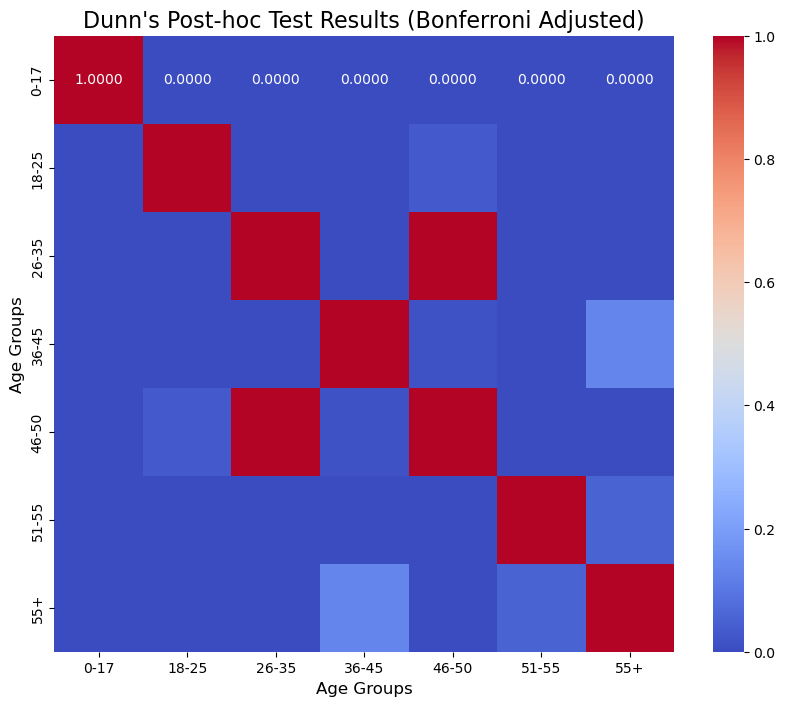

              1             2             3             4             5  \
1  1.000000e+00  4.822696e-06  3.205389e-12  7.335133e-20  4.153425e-10   
2  4.822696e-06  1.000000e+00  1.911628e-04  8.208873e-16  3.457340e-02   
3  3.205389e-12  1.911628e-04  1.000000e+00  1.609026e-06  1.000000e+00   
4  7.335133e-20  8.208873e-16  1.609026e-06  1.000000e+00  1.325949e-02   
5  4.153425e-10  3.457340e-02  1.000000e+00  1.325949e-02  1.000000e+00   
6  3.323871e-39  5.501099e-42  2.005849e-31  1.681316e-13  1.164196e-19   
7  1.193778e-20  6.391663e-13  3.968869e-07  1.351086e-01  4.129139e-05   

              6             7  
1  3.323871e-39  1.193778e-20  
2  5.501099e-42  6.391663e-13  
3  2.005849e-31  3.968869e-07  
4  1.681316e-13  1.351086e-01  
5  1.164196e-19  4.129139e-05  
6  1.000000e+00  5.374656e-02  
7  5.374656e-02  1.000000e+00  


In [7]:
import scikit_posthocs as sp

# Assuming your purchase data is already defined
all_purchases = [Age_1_purchases, Age_2_purchases, Age_3_purchases, Age_4_purchases, 
                 Age_5_purchases, Age_6_purchases, Age_7_purchases]

# Perform Dunn's post-hoc test
posthoc = sp.posthoc_dunn(all_purchases, p_adjust='bonferroni')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(posthoc, annot=True, fmt=".4f", cmap="coolwarm", cbar=True, 
            xticklabels=["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"],
            yticklabels=["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"])

# Add labels and title
plt.title("Dunn's Post-hoc Test Results (Bonferroni Adjusted)", fontsize=16)
plt.xlabel("Age Groups", fontsize=12)
plt.ylabel("Age Groups", fontsize=12)

# Display the plot
plt.show()

print(posthoc)
